In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

import cartopy.crs as ccrs
#import cartopy.feature as cfeat
#import cartopy.io.img_tiles as cimgt
from sklearn.neighbors import KNeighborsRegressor
#import AISMapPlot as aismap
import pickle

In [24]:

sectors = [0, 1, 2]
sector_borders = [52.8, 4.8, 6.0, 7.2, 8.6, 9.81]
positions = pd.DataFrame([[52.8, np.nan], [np.nan, 4.8], [np.nan, 6.0], [np.nan, 7.2], [np.nan, 8.6], [np.nan, 9.81]],
                         columns = ['Latitude', 'Longitude'])
    
ais_test = []  
for s in [0,2]:
  
    ais_test.append(pd.read_pickle('FEL-ROT_test_01min_s%d.pkl' % (s)))

In [26]:
time_loaded = []

for s in sectors:
    time_loaded.append(pickle.load(open('../App/Agents/fel_rot_s%d/model_time.pkl' % (s), 'rb')))

In [27]:
pos_loaded = []

for s in sectors:
    pos_loaded.append(pickle.load(open('../App/Agents/fel_rot_s%d/model_position.pkl' % (s), 'rb')))

In [28]:
cog_loaded = []

for s in sectors:
    cog_loaded.append(pickle.load(open('../App/Agents/fel_rot_s%d/model_cog.pkl' % (s), 'rb')))

In [29]:
sog_loaded = []

for s in sectors:
    sog_loaded.append(pickle.load(open('../App/Agents/fel_rot_s%d/model_sog.pkl' % (s), 'rb')))

In [30]:

ais_test[0]['1seclat']= pos_loaded[1].predict(ais_test[0][['sector_leave_lat','sector_leave_lon', 'sector_leave_cog', 'sector_leave_cog']])
ais_test[0]['1seclon']= sector_borders[1]
ais_test[0]['1secsog']= sog_loaded[1].predict(ais_test[0][['sector_leave_lat','sector_leave_lon', 'sector_leave_cog', 'sector_leave_cog']])
ais_test[0]['1seccog']= cog_loaded[1].predict(ais_test[0][['sector_leave_lat','sector_leave_lon', 'sector_leave_cog', 'sector_leave_cog']])


ais_test[0]['2seclat']= pos_loaded[2].predict(ais_test[0][['1seclat','1seclon', '1secsog', '1seccog']])
ais_test[0]['2seclon']= sector_borders[2]
ais_test[0]['2secsog']= sog_loaded[2].predict(ais_test[0][['1seclat','1seclon', '1secsog', '1seccog']])
ais_test[0]['2seccog']= cog_loaded[2].predict(ais_test[0][['1seclat','1seclon', '1secsog', '1seccog']])



ais_test[1]['2seclat']= pos_loaded[2].predict(ais_test[1][['sector_leave_lat','sector_leave_lon', 'sector_leave_cog', 'sector_leave_cog']])
ais_test[1]['2seclon']= sector_borders[2]
ais_test[1]['2secsog']= sog_loaded[2].predict(ais_test[1][['sector_leave_lat','sector_leave_lon', 'sector_leave_cog', 'sector_leave_cog']])
ais_test[1]['2seccog']= cog_loaded[2].predict(ais_test[1][['sector_leave_lat','sector_leave_lon', 'sector_leave_cog', 'sector_leave_cog']])











In [35]:
ais_test[0]['mins'] = (time_loaded[0].predict(ais_test[0][['Latitude','Longitude','COG','SOG']])) + (time_loaded[1].predict(ais_test[0][['sector_leave_lat', 'sector_leave_lon', 'sector_leave_cog', 'sector_leave_sog']])) + (time_loaded[2].predict(ais_test[0][['1seclat','1seclon','1seccog','1secsog']])) 
# ais_test[1]['mins'] = (time_loaded[1].predict(ais_test[1][['Latitude','Longitude','COG','SOG']])) + (time_loaded[2].predict(ais_test[1][['sector_leave_lat', 'sector_leave_lon', 'sector_leave_cog', 'sector_leave_sog']])) 
ais_test[1]['mins'] = (time_loaded[2].predict(ais_test[1][['Latitude','Longitude','COG','SOG']])) 

In [37]:
predicts = pd.concat([ais_test[0]['mins'],ais_test[1]['mins']])
end = pd.concat([ais_test[0]['remainingMins'], ais_test[1]['remainingMins']])

In [38]:
diff = predicts-end

In [39]:


for s in sectors:
    predicts_frame = (pd.DataFrame({'correct': end, 'predicted': predicts, 'diff': diff}))
    predicts_frame['abs_error'] = predicts_frame['diff'].transform(lambda x: abs(x))
    predicts_frame = predicts_frame.sort_values('correct')


In [40]:
predicts_frame['abs_error'].describe()

count    198.000000
mean      56.769393
std       30.345562
min        0.119138
25%       56.674209
50%       71.908551
75%       75.622986
max       85.218458
Name: abs_error, dtype: float64

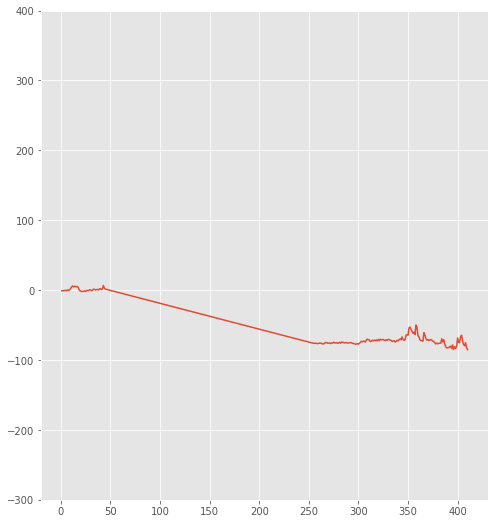

In [41]:
plt.figure(figsize = (8, 9))
axes = plt.gca()
axes.set_ylim([-300,400])
plt.plot(predicts_frame['correct'], predicts_frame['diff'])
plt.savefig('../Images/fel_rot_sectors_mixed.png', dpi = 300, bbox_inches = 'tight')

In [111]:
predicts_frame[1]['abs_error'].describe()

count    172.000000
mean     182.001605
std        3.957434
min      172.272786
25%      178.122618
50%      182.533051
75%      185.321036
max      189.015414
Name: abs_error, dtype: float64

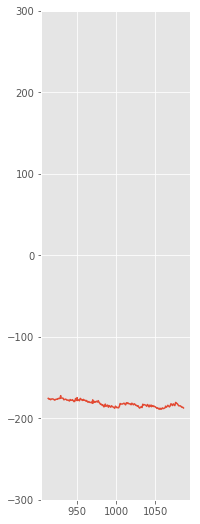

In [112]:
plt.figure(figsize = (2.666, 9))
axes = plt.gca()
axes.set_ylim([-300,300])
plt.plot(predicts_frame[1]['correct'], predicts_frame[1]['diff'])
# plt.savefig('../Images/rot_ham_complete_rfr_test.png', dpi = 300, bbox_inches = 'tight')

In [113]:
predicts_frame[2]['abs_error'].describe()

count    181.000000
mean     119.430985
std        2.727065
min      115.041964
25%      117.896081
50%      118.907042
75%      119.856901
max      130.412673
Name: abs_error, dtype: float64

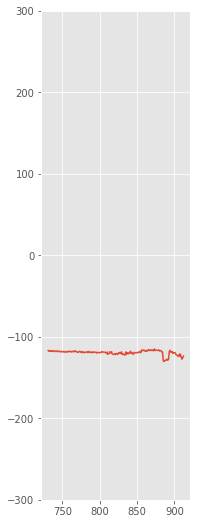

In [114]:
plt.figure(figsize = (2.666, 9))
axes = plt.gca()
axes.set_ylim([-300,300])
plt.plot(predicts_frame[2]['correct'], predicts_frame[2]['diff'])
# plt.savefig('../Images/rot_ham_complete_rfr_test.png', dpi = 300, bbox_inches = 'tight')

In [115]:
predicts_frame[3]['abs_error'].describe()

count    185.000000
mean       4.967908
std        2.058602
min        0.269951
25%        3.489503
50%        5.158585
75%        6.537909
max        8.902757
Name: abs_error, dtype: float64

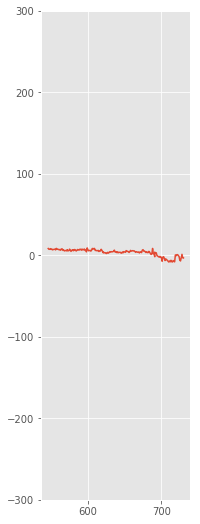

In [116]:
plt.figure(figsize = (2.666, 9))
axes = plt.gca()
axes.set_ylim([-300,300])
plt.plot(predicts_frame[3]['correct'], predicts_frame[3]['diff'])
# plt.savefig('../Images/rot_ham_complete_rfr_test.png', dpi = 300, bbox_inches = 'tight')

In [117]:
predicts_frame[4]['abs_error'].describe()

count    241.000000
mean      36.073651
std       18.307182
min        0.046034
25%       28.744514
50%       35.867946
75%       46.472035
max      104.046927
Name: abs_error, dtype: float64

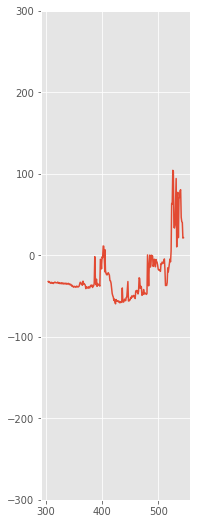

In [118]:
plt.figure(figsize = (2.666, 9))
axes = plt.gca()
axes.set_ylim([-300,300])
plt.plot(predicts_frame[4]['correct'], predicts_frame[4]['diff'])
# plt.savefig('../Images/rot_ham_complete_rfr_test.png', dpi = 300, bbox_inches = 'tight')

In [119]:
predicts_frame[5]['abs_error'].describe()

count    304.000000
mean       8.004597
std        6.421208
min        0.009384
25%        2.466308
50%        6.367196
75%       12.736857
max       28.919669
Name: abs_error, dtype: float64

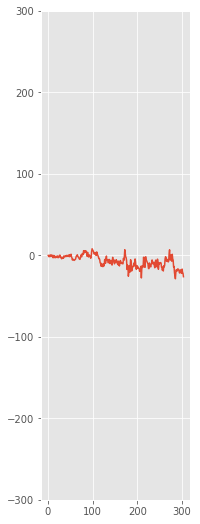

In [120]:
plt.figure(figsize = (2.666, 9))
axes = plt.gca()
axes.set_ylim([-300,300])
plt.plot(predicts_frame[5]['correct'], predicts_frame[5]['diff'])

# plt.savefig('../Images/rot_ham_complete_rfr_test.png', dpi = 300, bbox_inches = 'tight')